[View in Colaboratory](https://colab.research.google.com/github/Coconuthack/GoogleMLcrashCourse/blob/master/tensorflow_programming_concepts.ipynb)

#### Copyright 2017 Google LLC.

In [0]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow Programming Concepts

**Learning Objectives:**
  * Learn the basics of the TensorFlow programming model, focusing on the following concepts:
    * tensors
    * operations
    * graphs
    * sessions
  * Build a simple TensorFlow program that creates a default graph, and a session that runs the graph

**Note:** Please read through this tutorial carefully. The TensorFlow programming model is probably different from others that you have encountered, and thus may not be as intuitive as you'd expect.

## Overview of Concepts

TensorFlow gets its name from **tensors**, which are arrays of arbitrary dimensionality. Using TensorFlow, you can manipulate tensors with a very high number of dimensions. That said, most of the time you will work with one or more of the following low-dimensional tensors:

  * A **scalar** is a 0-d array (a 0th-order tensor).  For example, `"Howdy"` or `5`
  * A **vector** is a 1-d array (a 1st-order tensor).  For example, `[2, 3, 5, 7, 11]` or `[5]`
  * A **matrix** is a 2-d array (a 2nd-order tensor).  For example, `[[3.1, 8.2, 5.9][4.3, -2.7, 6.5]]`

TensorFlow **operations** create, destroy, and manipulate tensors.  Most of the lines of code in a typical TensorFlow program are operations.

A TensorFlow **graph** (also known as a **computational graph** or a **dataflow graph**) is, yes, a graph data structure.  A graph's nodes are operations (in TensorFlow, every operation is associated with a graph).  Many TensorFlow programs consist of a single graph, but TensorFlow programs may optionally create multiple graphs. A graph's nodes are operations; a graph's edges are tensors. Tensors flow through the graph, manipulated at each node by an operation. The output tensor of one operation often becomes the input tensor to a subsequent operation. TensorFlow implements a **lazy execution model,** meaning that nodes are only computed when needed, based on the needs of associated nodes.

Tensors can be stored in the graph as **constants** or **variables**. As you might guess, constants hold tensors whose values can't change, while variables hold tensors whose values can change. However, what you may not have guessed is that constants and variables are just more operations in the graph. A constant is an operation that always returns the same tensor value. A variable is an operation that will return whichever tensor has been assigned to it.

To define a constant, use the `tf.constant` operator and pass in its value. For example:

```
  x = tf.constant(5.2)
```

Similarly, you can create a variable like this:

```
  y = tf.Variable([5])
```

Or you can create the variable first and then subsequently assign a value like this (note that you always have to specify a default value):

```
  y = tf.Variable([0])
  y = y.assign([5])
```

Once you've defined some constants or variables, you can combine them with other operations like `tf.add`. When you evaluate the `tf.add` operation, it will call your `tf.constant` or `tf.Variable` operations to get their values and then return a new tensor with the sum of those values.

Graphs must run within a TensorFlow **session**, which holds the state for the graph(s) it runs:

```
with tf.Session() as sess:
  initialization = tf.global_variables_initializer()
  print y.eval()
```

When working with `tf.Variable`s, you must explicitly initialize them by calling `tf.global_variables_initializer` at the start of your session, as shown above.

**Note:** A session can distribute graph execution across multiple machines (assuming the program is run on some distributed computation framework). For more information, see [Distributed TensorFlow](https://www.tensorflow.org/deploy/distributed).

### Summary

TensorFlow programming is essentially a two-step process:

  1. Assemble constants, variables, and operations into a graph.
  2. Evaluate those constants, variables and operations within a session.


## Creating a Simple TensorFlow Program

Let's look at how to code a simple TensorFlow program that adds two constants. 

### Provide import statements

As with nearly all Python programs, you'll begin by specifying some `import` statements.
The set of `import` statements required to run a TensorFlow program depends, of course, on the features your program will access. At a minimum, you must provide the `import tensorflow` statement in all TensorFlow programs:

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Don't forget to execute the preceding code block (the `import` statements).**

Other common import statements include the following:

```
  import matplotlib.pyplot as plt # Dataset visualization.
  import numpy as np              # Low-level numerical Python library.
  import pandas as pd             # Higher-level numerical Python library.
```

TensorFlow provides a **default graph**. However, we recommend explicitly creating your own `Graph` instead to facilitate tracking state (e.g., you may wish to work with a different `Graph` in each cell).

In [6]:
import tensorflow as tf

# Create a graph.
g = tf.Graph()

# Establish the graph as the "default" graph.
with g.as_default():
  # Assemble a graph consisting of the following three operations:
  #   * Two tf.constant operations to create the operands.
  #   * One tf.add operation to add the two operands.
  x = tf.constant(8, name="x_const")
  y = tf.constant(15, name="y_const")
  my_sum = tf.add(x, y, name="x_y_sum")
  z = tf.constant(4,name='z')
  new_sum = tf.add(my_sum, z, name ='x_y_z_sum')


  # Now create a session.
  # The session will run the default graph.
  with tf.Session() as sess:
    print new_sum.eval()

27


## Exercise: Introduce a Third Operand

Revise the above code listing to add three integers, instead of two:

  1. Define a third scalar integer constant, `z`, and assign it a value of `4`.
  2. Add `z` to `my_sum` to yield a new sum.
  
  **Hint:** See the API docs for [tf.add()](https://www.tensorflow.org/api_docs/python/tf/add) for more details on its function signature.
  
  3. Re-run the modified code block. Did the program generate the correct grand total?

### Solution

Click below for the solution.

In [0]:
# Create a graph.
g = tf.Graph()

# Establish our graph as the "default" graph.
with g.as_default():
  # Assemble a graph consisting of three operations. 
  # (Creating a tensor is an operation.)
  x = tf.constant(8, name="x_const")
  y = tf.constant(5, name="y_const")
  my_sum = tf.add(x, y, name="x_y_sum")
  
  # Task 1: Define a third scalar integer constant z.
  z = tf.constant(4, name="z_const")
  # Task 2: Add z to `my_sum` to yield a new sum.
  new_sum = tf.add(my_sum, z, name="x_y_z_sum")

  # Now create a session.
  # The session will run the default graph.
  with tf.Session() as sess:
    # Task 3: Ensure the program yields the correct grand total.
    print new_sum.eval()

## Further Information

To explore basic TensorFlow graphs further, experiment with the following tutorial:

  * [Mandelbrot set](https://www.tensorflow.org/tutorials/mandelbrot#mandelbrot-set)

# Mandelbrot Set


In [7]:
#libs for simulation
import tensorflow as tf
import numpy as np

# libs for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display


In [9]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.29*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()]=0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [10]:
sess = tf.InteractiveSession()

In [11]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

In [12]:
Y

array([[-1.3  , -1.3  , -1.3  , ..., -1.3  , -1.3  , -1.3  ],
       [-1.295, -1.295, -1.295, ..., -1.295, -1.295, -1.295],
       [-1.29 , -1.29 , -1.29 , ..., -1.29 , -1.29 , -1.29 ],
       ...,
       [ 1.285,  1.285,  1.285, ...,  1.285,  1.285,  1.285],
       [ 1.29 ,  1.29 ,  1.29 , ...,  1.29 ,  1.29 ,  1.29 ],
       [ 1.295,  1.295,  1.295, ...,  1.295,  1.295,  1.295]])

In [13]:
X

array([[-2.   , -1.995, -1.99 , ...,  0.985,  0.99 ,  0.995],
       [-2.   , -1.995, -1.99 , ...,  0.985,  0.99 ,  0.995],
       [-2.   , -1.995, -1.99 , ...,  0.985,  0.99 ,  0.995],
       ...,
       [-2.   , -1.995, -1.99 , ...,  0.985,  0.99 ,  0.995],
       [-2.   , -1.995, -1.99 , ...,  0.985,  0.99 ,  0.995],
       [-2.   , -1.995, -1.99 , ...,  0.985,  0.99 ,  0.995]])

In [14]:
Z

array([[-2.   -1.3j  , -1.995-1.3j  , -1.99 -1.3j  , ...,  0.985-1.3j  ,
         0.99 -1.3j  ,  0.995-1.3j  ],
       [-2.   -1.295j, -1.995-1.295j, -1.99 -1.295j, ...,  0.985-1.295j,
         0.99 -1.295j,  0.995-1.295j],
       [-2.   -1.29j , -1.995-1.29j , -1.99 -1.29j , ...,  0.985-1.29j ,
         0.99 -1.29j ,  0.995-1.29j ],
       ...,
       [-2.   +1.285j, -1.995+1.285j, -1.99 +1.285j, ...,  0.985+1.285j,
         0.99 +1.285j,  0.995+1.285j],
       [-2.   +1.29j , -1.995+1.29j , -1.99 +1.29j , ...,  0.985+1.29j ,
         0.99 +1.29j ,  0.995+1.29j ],
       [-2.   +1.295j, -1.995+1.295j, -1.99 +1.295j, ...,  0.985+1.295j,
         0.99 +1.295j,  0.995+1.295j]])

In [15]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [16]:
tf.global_variables_initializer().run()


In [17]:
# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_), # sz is the x
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )


* tf.group : creates an op that groups multiple operations
*  tf.assign  : outputs tensor after value been assigned?, allowsfor chaining
*   tf.assign_add : updates ref by adding value to it? assign used for variables
* 



In [18]:
# run it for a couple hundred steps
for i in range(200): step.run()


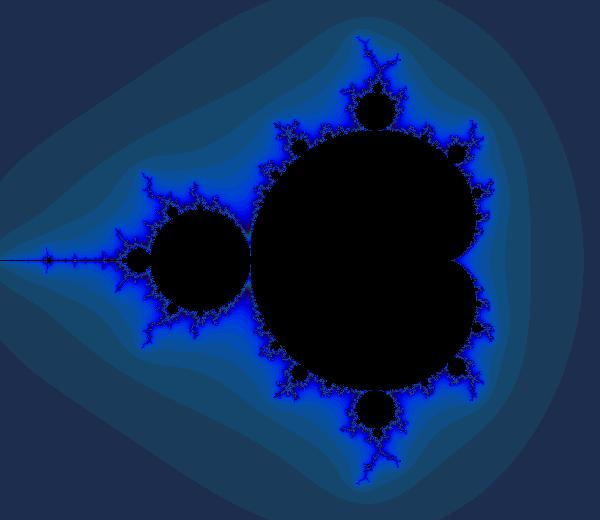

In [19]:
DisplayFractal(ns.eval())
